# imdb 영화평 분석

## 지도학스 기반 - LogisticRegression을 이용한 감성 분석

### 데이터 ㄹ딩 및 확인

In [3]:
import pandas as pd

revied_df = pd.read_csv('dataset/labeledTrainData.tsv',header = 0 , sep='\t',quoting=3)
revied_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [4]:
revied_df.shape

(25000, 3)

In [8]:
revied_df['review'][0]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for 

### 데이터 전처리
- br 태그 삭제
- 알파벳이 아닌 문자 삭제

In [5]:
revied_df['review'] =  revied_df['review'].str.replace('<br />',' ')


In [7]:
import re

revied_df['review'] = revied_df['review'].apply(lambda x : re.sub('[^a-zA-Z]',' ',x))

### 데이터 분리

In [9]:
revied_df['sentiment'].value_counts()

sentiment
1    12500
0    12500
Name: count, dtype: int64

In [10]:
X = revied_df['review']
y = revied_df['sentiment']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)


### 모델 학습 및 평가

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

tfidf_vect = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
X_train_tfidf_vect = tfidf_vect.fit_transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear',C =10)
lr_clf.fit(X_train_tfidf_vect,y_train)

y_hat = lr_clf.predict(X_test_tfidf_vect)
pre_prob_positive = lr_clf.predict_proba(X_test_tfidf_vect)[:,1]

print(f'정확도:{accuracy_score(y_test,y_hat):.3f}')
print(f'AUC:{roc_auc_score(y_test,pre_prob_positive):.3f}')


정확도:0.893
AUC:0.959


## 비지도 학습 기반 감성 분석

### WordNet Synset 과 SentiWordNet SentiSynset

- NLTK의 모든 데이터 세트와 패키지 다운로드

In [14]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]    | Do

True

### WordNet 주요기능
- wordnet은 시멘틱(문맥상 의미) 분석을 제공하는 어휘 사전이다
- synsets(): 하나의 단어가 가질수 있는 여러가지 시멘틱 정보를 synset 객체로 반환
- Synset 객체(aaaa.b.c 형식): aaaa -> 단어이름, b-> 품사, c -> 같은 품사 그룹의 인덱스

In [16]:
from nltk.corpus import wordnet as wn
term = 'present'
synsets = wn.synsets(term)
print('synsets() 반환 type:',type(synsets))
print('synsets() 반환 값 개수:',len(synsets))
print('synsets() 반환 값:',synsets)

synsets() 반환 type: <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [18]:
for synset in synsets:
    print(f'#### Synset: {synset.name()} ####')
    print(f'POS(Parts of Speech): {synset.lexname()}')
    print(f'Definition: {synset.definition()}')
    print(f'Lemma: {synset.lemma_names()}')
    print()

#### Synset: present.n.01 ####
POS(Parts of Speech): noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemma: ['present', 'nowadays']

#### Synset: present.n.02 ####
POS(Parts of Speech): noun.possession
Definition: something presented as a gift
Lemma: ['present']

#### Synset: present.n.03 ####
POS(Parts of Speech): noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemma: ['present', 'present_tense']

#### Synset: show.v.01 ####
POS(Parts of Speech): verb.perception
Definition: give an exhibition of to an interested audience
Lemma: ['show', 'demo', 'exhibit', 'present', 'demonstrate']

#### Synset: present.v.02 ####
POS(Parts of Speech): verb.communication
Definition: bring forward and present to the mind
Lemma: ['present', 'represent', 'lay_out']

#### Synset: stage.v.01 ####
POS(Parts of Speech): verb.creation
Definition: perform (a play), especially on a st

- Synset 객체의 path_similarity() 함수를 통해 단어의 상호 유사도를 확인할 수 있다

In [19]:
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger,cat,dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

for entity in entities:
    similaritiy = [ round(entity.path_similarity(compared_entity),2) for compared_entity in entities]
    similarities.append(similaritiy)

similarities_df = pd.DataFrame(similarities,columns=entity_names,index=entity_names)
similarities_df


,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


### SentiWordNet 주요 기능
- WordNet 과 유사한 기능을 갖는 모듈
- 단어의 감성을 나타내는 '감성지수'와 객관성을 나타낸 '객관성 지수'를 가지고 있다.

In [21]:
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print(f'senti_synsets() 반환 type:{type(senti_synsets)}')
print(f'senti_synsets() 반환 값 개수:{len(senti_synsets)}')
print(f'senti_synsets() 반환 값 :{senti_synsets}')



senti_synsets() 반환 type:<class 'list'>
senti_synsets() 반환 값 개수:11
senti_synsets() 반환 값 :[SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [28]:
father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수:',father.pos_score())
print('father 부정감성 지수:',father.neg_score())
print('father 객관성 지수:',father.obj_score())

fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수:',fabulous.pos_score())
print('fabulous 부정감성 지수:',fabulous.neg_score())
print('fabulous 객관성 지수:',fabulous.obj_score())

father 긍정감성 지수: 0.0
father 부정감성 지수: 0.0
father 객관성 지수: 1.0
fabulous 긍정감성 지수: 0.875
fabulous 부정감성 지수: 0.125
fabulous 객관성 지수: 0.0


### SentiWordNeet을 이용한 영화 감상평 감성 분석
- 분석 절차
    - (1) 문서를 문장 단위로 분해
    - (2) 문장을 단어 단위로 토큰
    - (3) 토큰화된 단어의 어근 추출 및 품사 태깅
    - (4) senti_synset 에서 긍정/부정 감성 지수를 구하고, 이를 모두 합산하여 특정 임계치 이상일 경우 긍정으로 그렇지 않으면 부정으로 분류

In [29]:
from nltk.corpus import wordnet as wn

# NLtK PennTreeBank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

#### 감성지수 반환 함수 정의
- 각 단어의 긍정 감성 지수와 부정 감성 지수를 모두 합한 총 감성 지수가 0 이상이면 긍정 감성(1)
- POS 표

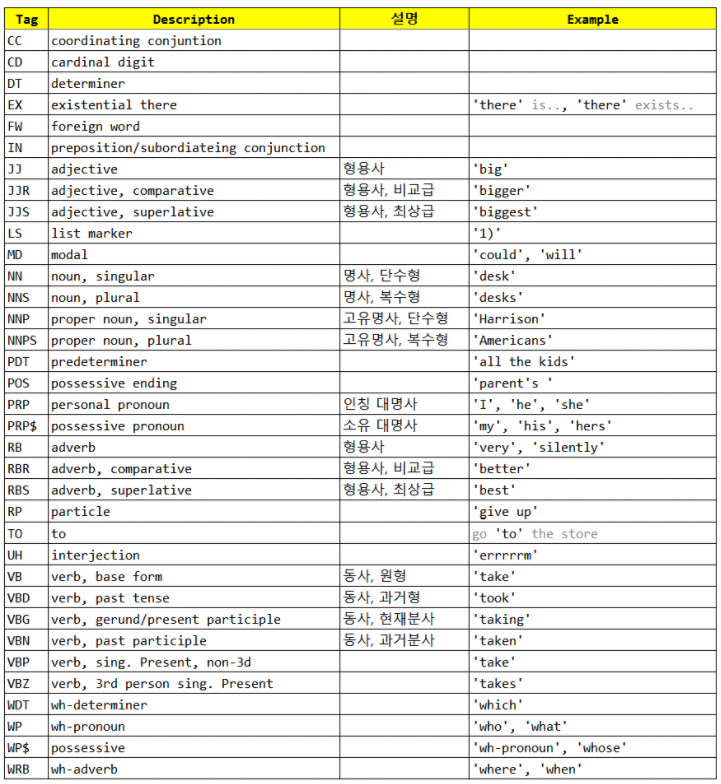

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize,pos_tag

def swn_polarity(text):
    sentiment = 0.0 # 감성 지수 초기화
    token_count = 0

    lemmarizer = WordNetLemmatizer() # 어근 추출 클래스
    raw_sentences = sent_tokenize(text) # 문서를 문장 단위로 분할

    for raw_sentence in raw_sentences:
        # pos_tag() 품사 분류, 단어와 품사를 값으로 갖는 튜플 반환
        tagged_sentences = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentences:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ,wn.ADV):
                continue
            # lemmatize(): 토큰된 단어의 원형(어근)
            lemma = lemmarizer.lemmatize(word,pos = wn_tag)
            if not lemma: # 해당하는 어근이 존재하지 않으면 pass
                continue

            synsets = wn.synsets(lemma,pos = wn_tag)
            if not synsets:
                continue
            
            # 해당 품사의 SynSet객체 중 첫 번째 객체에 대한 감성 분석을 하겠다는 의미
            synset = synsets[0]
            # synset.name() 해당 단어에 대한 aaaa.b.c 형태의 값 반환
            swn_synset = swn.senti_synset(synset.name())

            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            token_count += 1

    if not token_count:
        return 0
    if sentiment >= 0 :
        return 1
    
    return 0



In [39]:
text = revied_df['review'][0]
# print(text)
sentences = sent_tokenize(text)
# print(len(sentences),sentences[:2])
tagged = pos_tag(word_tokenize(sentences[0]))
# print(len(tagged))
# print(tagged)
word_list= []
for word, tag in tagged:
    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        continue
    word_list.append((word,wn_tag))

lemmarizer = WordNetLemmatizer()
lemma = lemmarizer.lemmatize('stuff',pos = 'n')
print(lemma)

synsets = wn.synsets(lemma, pos ='n')
print(synsets)
synset = synsets[0]
print(synset.name())
swn_synset = swn.senti_synset(synset.name())
print(swn_synset)

stuff
[Synset('material.n.01'), Synset('stuff.n.02'), Synset('stuff.n.03'), Synset('stuff.n.04'), Synset('stuff.n.05'), Synset('stuff.n.06'), Synset('stuff.n.07')]
material.n.01
<material.n.01: PosScore=0.0 NegScore=0.0>


#### 리뷰에 대한 감성지수 값을 예측 값으로 계산

In [40]:
revied_df['preds'] = revied_df['review'].apply(lambda x : swn_polarity(x))

In [42]:
y_target = revied_df['sentiment'].values
y_hat = revied_df['preds'].values

#### 예측 정확도 확인

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score

print(confusion_matrix(y_target,y_hat))
print(f'정확도 : {accuracy_score(y_target,y_hat):.3f}')
print(f'정밀도 : {precision_score(y_target,y_hat):.3f}')
print(f'재현율 : {recall_score(y_target,y_hat):.3f}')

[[7668 4832]
 [3636 8864]]
정확도 : 0.661
정밀도 : 0.647
재현율 : 0.709


## VADER를 이용한 감성 분석
- 소셜 미디어의 감성 분석 용도로 만들어진 감성 사진
- SentimentIntensityAnalyzer 객체 이용
- polarity_score() 함수: 딕셔너리 형태의 감성 점수 반환
    - neg : 부정 감성 지수
    - neu : 중립 감성 지수
    - pos : 긍정 감성 지수
    - compound: neg, neu, pos 를 적절히 조합해서 만든 -1 ~ 1 사이의 감성지수 (0.1 이상이면 긍정감성, 그 이하이면 부정감성으로 판단) 

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_score = senti_analyzer.polarity_scores(revied_df['review'][0])
print(senti_score)
print(revied_df['sentiment'][0])

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}
1


### 긍정/부정 판별 함수 정의
- polarity_score() 함수의 compound 값 기반으로 긍정/부정 분류

In [49]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)

    agg_score = scores['compound']
    final_sentiment = 1 if agg_score > threshold else 0

    return final_sentiment

revied_df['vader_preds'] = revied_df['review'].apply(lambda x : vader_polarity(x,0.1))

In [50]:
y_target = revied_df['sentiment'].values
y_hat = revied_df['vader_preds'].values

print(confusion_matrix(y_target,y_hat))
print(f'정확도 : {accuracy_score(y_target,y_hat):.3f}')
print(f'정밀도 : {precision_score(y_target,y_hat):.3f}')
print(f'재현율 : {recall_score(y_target,y_hat):.3f}')

[[ 6747  5753]
 [ 1858 10642]]
정확도 : 0.696
정밀도 : 0.649
재현율 : 0.851
